In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings

## Modules

In [5]:
from example_funcs import *

# Assignment 1 Q4 - Extra explorations

## Fixed points

In [11]:
# define map
def f(x):
    f1 = x**2+1
    return f1

In [15]:
# set number of iterations
Nsteps = 50;

# set initial condition
x0 = np.array([0.5-1j*np.sqrt(3)/2,0.5+1j*np.sqrt(3)/2]);

# create empty solution vector 
xtraj = np.empty((Nsteps+1,x0.shape[0]),dtype=np.complex128);
xtraj[:] = np.nan

# input initial condition
xtraj[0,:] = x0;

In [16]:
# iterate map
for i in np.arange(0,Nsteps):
    x0 = f(x0);
    xtraj[i+1,:] = np.squeeze(x0);

### Plot solution

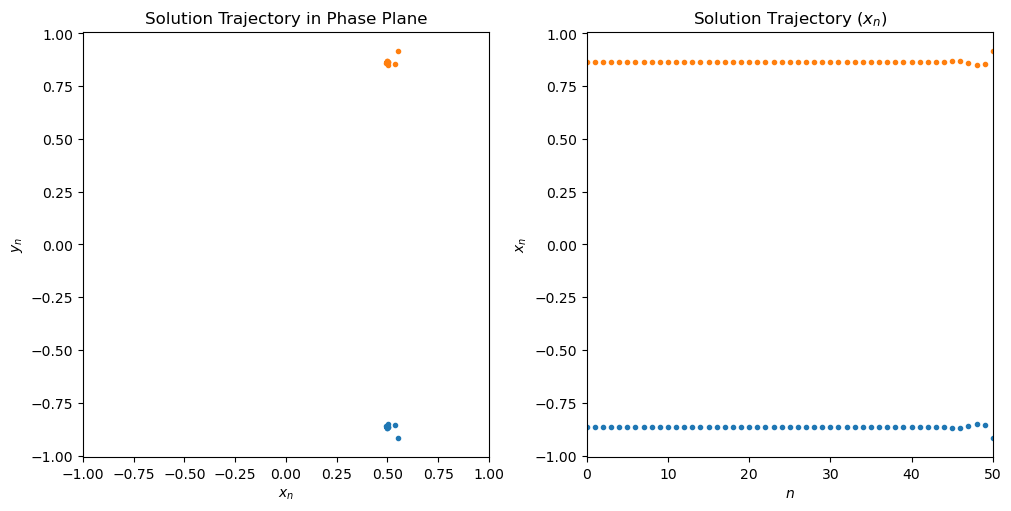

In [31]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 5))

ax1 = axs[0]
ax1.plot(np.real(xtraj),np.imag(xtraj),'.')
ax1.set_xlabel("$x_n$")
ax1.set_ylabel("$y_n$")
ax1.set_title("Solution Trajectory in Phase Plane")
ax1.set_xlim([-1, 1])

ax2 = axs[1] 
ax2.plot(np.arange(0,Nsteps+1),np.imag(xtraj),'.')
ax2.set_xlabel("$n$")
ax2.set_ylabel("$x_n$")
ax2.set_title("Solution Trajectory ($x_n$)")
ax2.set_xlim([0, 50])

plt.show()

## Period-2 points

In [34]:
# set number of iterations
Nsteps = 35;

# set initial condition
x0 = np.array([-0.5-1j*np.sqrt(7)/2,-0.5+1j*np.sqrt(7)/2]);

# create empty solution vector 
xtraj = np.empty((Nsteps+1,x0.shape[0]),dtype=np.complex128);
xtraj[:] = np.nan

# input initial condition
xtraj[0,:] = x0;

In [35]:
# iterate map
for i in np.arange(0,Nsteps):
    x0 = f(x0);
    xtraj[i+1,:] = np.squeeze(x0);

### Plot solution

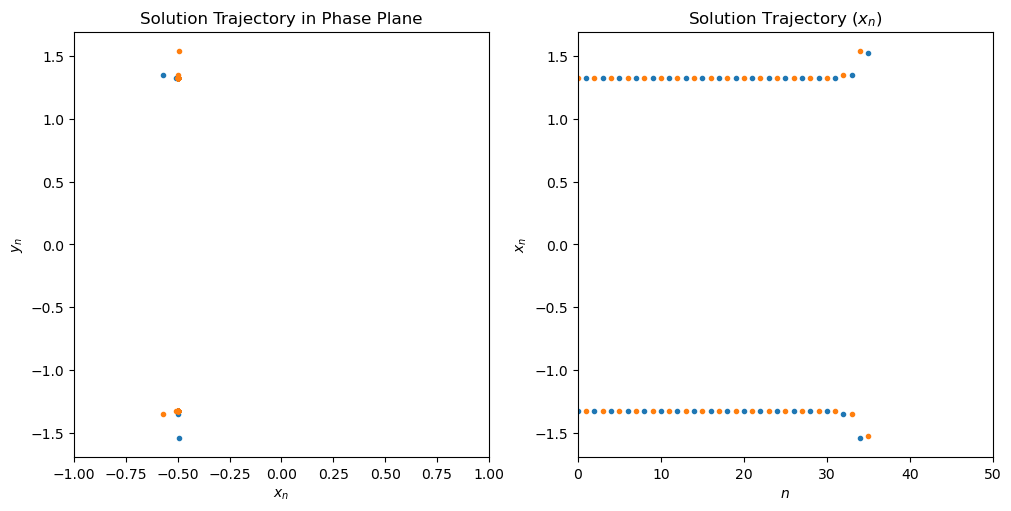

In [36]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 5))

ax1 = axs[0]
ax1.plot(np.real(xtraj),np.imag(xtraj),'.')
ax1.set_xlabel("$x_n$")
ax1.set_ylabel("$y_n$")
ax1.set_title("Solution Trajectory in Phase Plane")
ax1.set_xlim([-1, 1])

ax2 = axs[1] 
ax2.plot(np.arange(0,Nsteps+1),np.imag(xtraj),'.')
ax2.set_xlabel("$n$")
ax2.set_ylabel("$x_n$")
ax2.set_title("Solution Trajectory ($x_n$)")
ax2.set_xlim([0, 50])

plt.show()

## Allow for changing parameter

In [74]:
# define map
def f2(x,lam):
    f1 = x**2+lam
    return f1

In [75]:
# create parameter vector
As = np.arange(-1.5,1.51,0.01)
Bs = np.arange(-1,1.01,0.01)

lams = np.empty((As.size*Bs.size,1),dtype=np.complex128)
i = 0;
j = 0;
for a in As:
    for b in Bs:
        # set parameters
        lams[i*len(Bs)+j] = a+1j*b
        j += 1     
    i += 1 
    j = 0

In [88]:
# set number of iterations
Nsteps = 100;

# set initial condition
x0 = np.zeros((len(lams),1),dtype=np.complex128);

# create empty solution vector 
xtraj = np.empty((Nsteps+1,x0.shape[0]),dtype=np.complex128);
xtraj[:] = np.nan

# input initial condition
xtraj[0,:] = np.squeeze(x0);

In [89]:
# iterate map
for i in np.arange(0,Nsteps):
    x0 = f2(x0,lams);
    xtraj[i+1,:] = np.squeeze(x0);

C:\Users\quinncr\AppData\Local\Temp\ipykernel_21612\427318728.py:3: RuntimeWarning: overflow encountered in square
  f1 = x**2+lam
C:\Users\quinncr\AppData\Local\Temp\ipykernel_21612\427318728.py:3: RuntimeWarning: invalid value encountered in square
  f1 = x**2+lam


### Plot solution

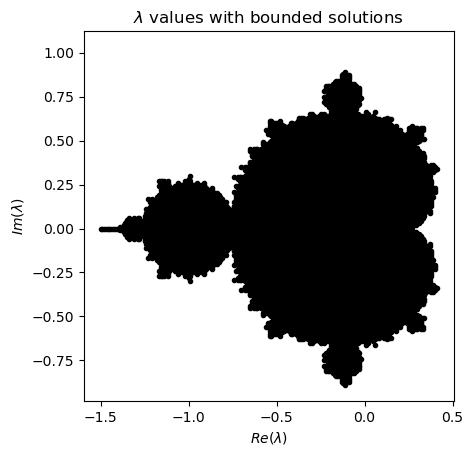

In [93]:
for k in np.arange(1,len(lams)):
    if abs(xtraj[-1,k])<1e9:
        plt.plot(np.real(lams[k]),np.imag(lams[k]),'k.')
plt.xlabel("$Re(\lambda)$")
plt.ylabel("$Im(\lambda)$")
plt.title("$\lambda$ values with bounded solutions")
plt.axis('square')

plt.show()

The above is known as the Mandelbrot set.  It has fractal behaviour along the boundary.